In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data'
current_dir  = %pwd
train_dir = os.path.join(current_dir, 'train')
test_dir = os.path.join(current_dir, 'test')

/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data


In [37]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

label_names = ['CAT', 'DOG']


In [38]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32, 
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32, 
    class_mode = 'binary'
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [ ]:
batch_of_images, labels = train_generator.next()

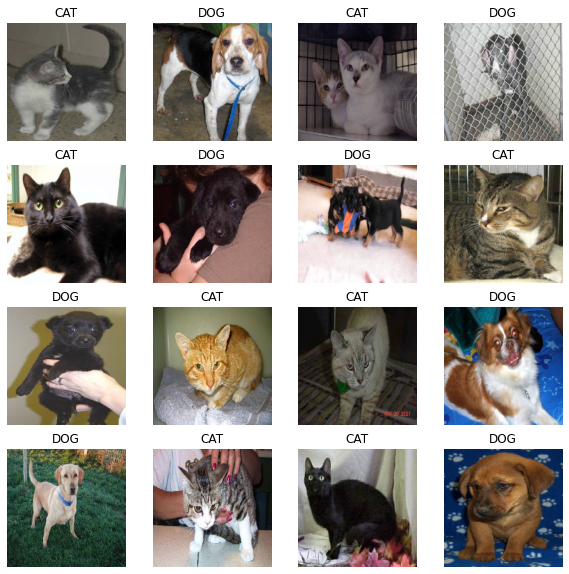

In [46]:

plt.figure(figsize=(10,10))
for i in range(0, 16):
  plt.subplot(4,4,i+1)
  plt.imshow(batch_of_images[i,...])
  plt.title(label_names[int(labels[i])])
  plt.axis('off')


In [58]:
model = tf.keras.models.Sequential(name = 'AlexNet')

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, input_shape = (224, 224, 3), data_format='channels_last', name = 'First-Conv-Layer'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, name = 'First-Pool-Layer'))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', name = 'Second-Conv_Layer'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, name = 'Second-Pool-Layer'))

model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', name = 'Third-Conv_Layer'))
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', name = 'Fourth-Conv_Layer'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', name = 'Fifth-Conv_Layer'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, name = 'Third-Pool-Layer'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=4096, activation=tf.keras.activations.relu, name = 'First-FullyConnected-Layer'))
model.add(tf.keras.layers.Dropout(rate = 0.5, name = 'First-Dropout-Layer'))

model.add(tf.keras.layers.Dense(units=4096, activation=tf.keras.activations.relu, name = 'Second-FullyConnected-Layer'))
model.add(tf.keras.layers.Dropout(rate = 0.5, name = 'Second-Dropout-Layer'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'Output-Layer'))

model.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First-Conv-Layer (Conv2D)    (None, 54, 54, 96)        34944     
_________________________________________________________________
First-Pool-Layer (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
Second-Conv_Layer (Conv2D)   (None, 26, 26, 256)       614656    
_________________________________________________________________
Second-Pool-Layer (MaxPoolin (None, 12, 12, 256)       0         
_________________________________________________________________
Third-Conv_Layer (Conv2D)    (None, 12, 12, 384)       885120    
_________________________________________________________________
Fourth-Conv_Layer (Conv2D)   (None, 12, 12, 384)       1327488   
_________________________________________________________________
Fifth-Conv_Layer (Conv2D)    (None, 12, 12, 256)       8849

In [59]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
 3/18 [====>.........................] - ETA: 1:47 - loss: 330919346176.0000 - accuracy: 0.5625